### Student Information
Name: 林柏臣

Student ID: 111062665

GitHub ID: danielpclin

Kaggle name: Daniel Lin

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

[Snapshot after extension](img/pic1.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__.

## First Part

In [1]:
### Begin Assignment Here
import pandas as pd

## load pickle files
train_df = pd.read_pickle("data/train_df.pkl")
test_df = pd.read_pickle("data/test_df.pkl")

---
### ** >>> Exercise 1 (Take home): **
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


<BarContainer object of 30 artists>

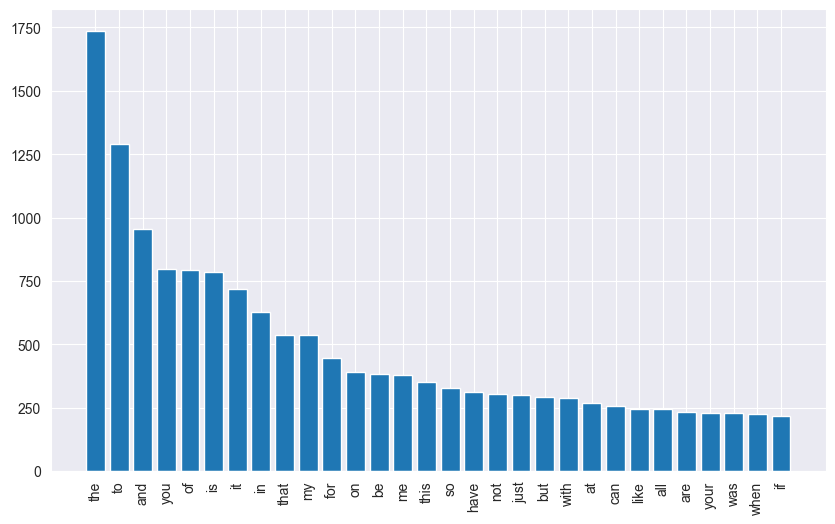

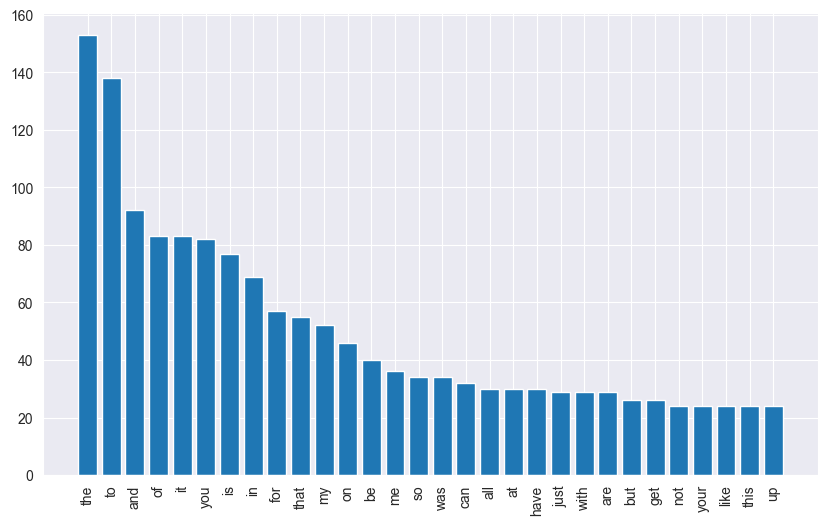

In [2]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text) # learn the vocabulary and return document-term matrix
train_counts = np.asarray(train_counts.sum(axis=0)).flatten() # count term frequency
train_ind = np.argsort(train_counts)[::-1][:30] # get sorted index
fig1 = plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
plt.bar(x=count_vect.get_feature_names_out()[train_ind], height=train_counts[train_ind])

test_counts = count_vect.transform(test_df.text)  #learn the vocabulary and return document-term matrix
test_counts = np.asarray(test_counts.sum(axis=0)).flatten() # count term frequency
test_ind = np.argsort(test_counts)[::-1][:30] # get sorted index
fig2 = plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
plt.bar(x=count_vect.get_feature_names_out()[test_ind], height=test_counts[test_ind])


---
### ** >>> Exercise 2 (Take home): **
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [3]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) # use TFIDF vectorizer
train_tfidf = tfidf_vect.fit_transform(train_df['text']) # learn the vocabulary and return tf-idf

tfidf_feature_names = tfidf_vect.get_feature_names_out() # get feature names
tfidf_feature_names[100:110] # show feature names

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **
Can you interpret the results above? What do they mean?

### Answer here
The confusion matrix is a representation of how many labels are correct, and how many are wrong and what the prediction is.
You can see how many predictions are correct by summing up the top left to bottom right cells.
You can compare the diagonal sum and the whole matrix sum to get the accuracy.

---
### ** >>> Exercise 4 (Take home): **
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.grid(False)
    plt.show()

C:\Users\danielpclin\PycharmProjects\DM2022-Lab2-Homework\venv\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train accuracy is 0.7918627179629117
test accuracy is 0.6974063400576369


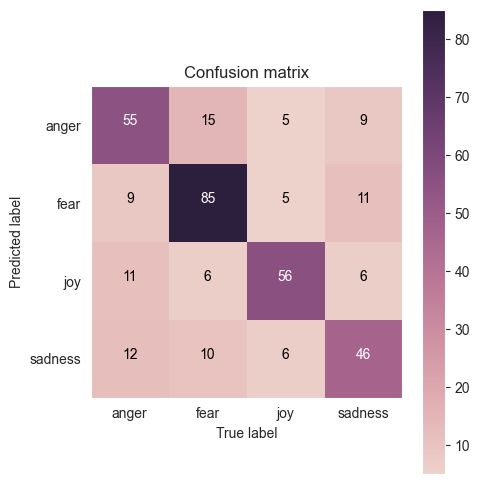

In [5]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

x_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
x_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

multinomial = MultinomialNB()
multinomial.fit(x_train, y_train)
pred_train = multinomial.predict(x_train)
pred_test = multinomial.predict(x_test)

print(f"train accuracy is {accuracy_score(y_true=y_train, y_pred=pred_train)}")
print(f"test accuracy is {accuracy_score(y_true=y_test, y_pred=pred_test)}")

mat = confusion_matrix(y_true=y_test, y_pred=pred_test)

plot_confusion_matrix(mat, classes=['anger', 'fear', 'joy', 'sadness'], title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here
We can see that with decision tree model, the training accuracy is close to 1. However, the testing accuracy is 0.66, we can say that the decision tree model has an overfitting problem. With the naive bayes model, the training and testing accuracy is much closer, however we still can see a little overfitting. Another thing that we observe is that with training accuracy, decision tree > naive bayes, and with testing data, naive bayes > decision tree.

---
### ** >>> Exercise 6 (Take home): **

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

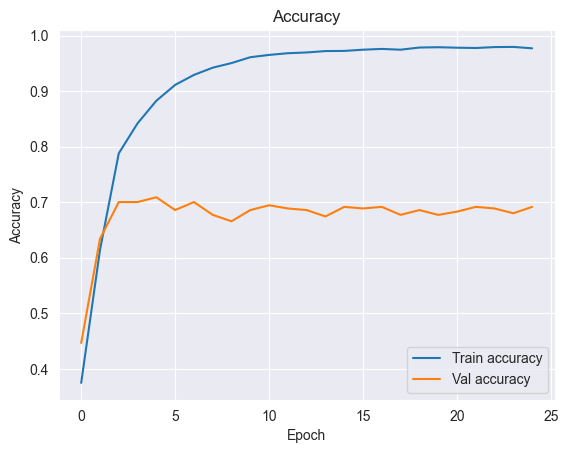

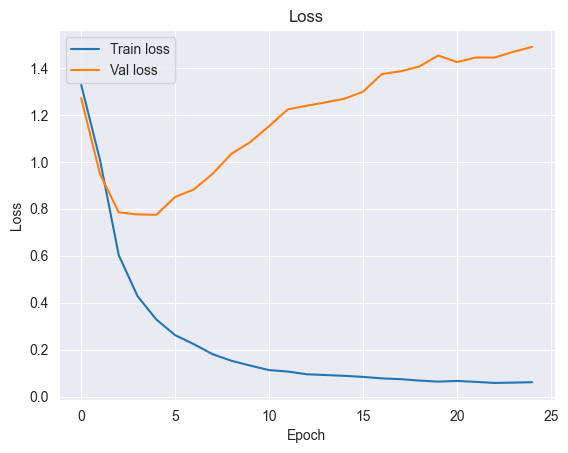

In [6]:
# Answer here
training_log = pd.read_csv("logs/training_log.csv")

plt.figure()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(training_log.epoch, training_log.accuracy)
plt.plot(training_log.epoch, training_log.val_accuracy)
plt.legend(["Train accuracy", "Val accuracy"])


plt.figure()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(training_log.epoch, training_log.loss)
plt.plot(training_log.epoch, training_log.val_loss)
plt.legend(["Train loss", "Val loss"])

When we look at the accuracy curve, the training accuracy slowly climbs, however the validation accuracy stops climbing at about 5th epoch. Which means there is overfitting.

---
### ** >>> Exercise 7 (Take home): **

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Answer here
We can average the vectors to represent a sentence, another way is to keep the word vector and pad all sentences to the same length, this way we will have a 2d representation of the sentence. We can also add position information to the word vectors, such as the position encoding used in transformers, with the position information, the model can learn about what different words may mean in different context.

---
### ** >>> Exercise 8 (Take home): **

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).


In [7]:
# Answer here
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [8]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

C:\Users\danielpclin\PycharmProjects\DM2022-Lab2-Homework\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\danielpclin\PycharmProjects\DM2022-Lab2-Homework\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


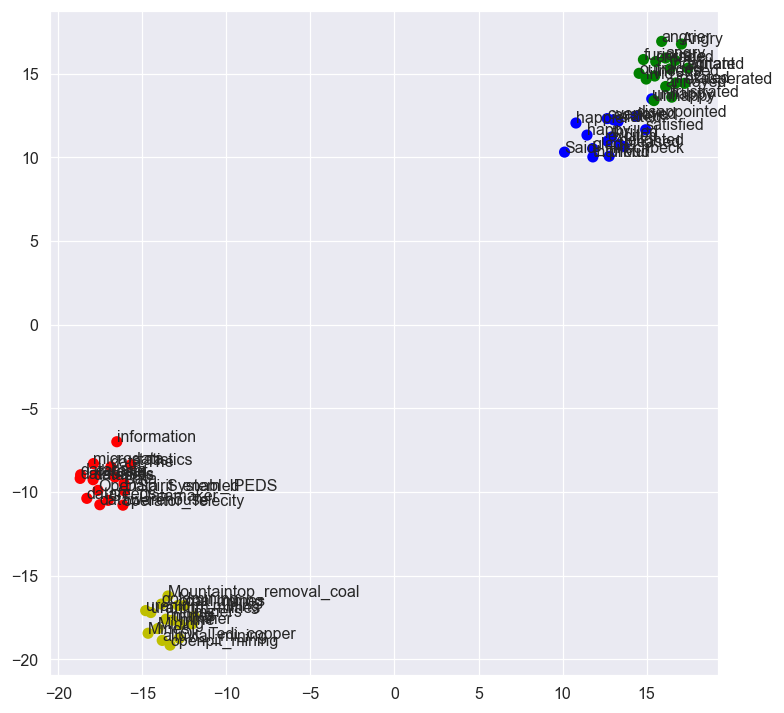

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


# Third Part

The code for the kaggle project is at `preprocess.py`, `train.py`, `predict.py` and `predict_ensemble.py`.

`preprocess.py` has four functions. We preprocess the embeddings, because it is slow.
`preprocess()` is to read the csv and json files and turn them into dataframes and save it as pickle files, it also generates a one hot encoding representation.
`adapt()` is to turn the words into embeddings by using TextVectorization and save it as a pickle file.
`dbert_tokenize()` and `roberta_tokenize()` is almost the same, but it uses different pretrained embeddings for different models. dbert is DistilBert, and roberta is Roberta.

`train.py` has five main functions, as I tried five different methods.

| method               | meaning                                           | validation acc | time per epoch    |
|----------------------|---------------------------------------------------|----------------|-------------------|
| train                | cnn and or lstm with TextVectorization embeddings | 0.596          | 6 minutes         |
| train_xgboost        | xgboost with TextVectorization embeddings         | 0.473          | N/A (total 8 hrs) |
| train_distil_xgboost | xgboost with pretrained distilbert embeddings     | 0.495          | N/A (total 8 hrs) |
| train_distilbert     | finetune distilbert model with data               | 0.66           | 3 hours           |
| train_roberta        | finetune roberta model with data                  | 0.68           | 5 hours           |

As you can see, fine-tuning roberta has the best performance.

`predict.py` has three functions to predict model with checkpoints of train / train_distilbert / train_roberta.

`predict_ensemble.py`  is main file use to generate submissions.
You specify the version num you want to ensemble and the method tou want to use. It first sees if there is `prediction.pickle` file to save computation power, if there is none, predict and save the pickle file.
After loading all the predictions, ensemble using the methods bellow.

| method        | meaning                                                                                          |
|---------------|--------------------------------------------------------------------------------------------------|
| occur_max     | calculate which label occurs the most, if there is a tie, use the max method                     |
| occur_sum_max | calculate which label occurs the most, if there is a tie, use the sum_max method                 |
| max           | with regard to each label, choose the max value                                                  |
| sum_max       | with regard to each label, sum all the value and get the max (average the different predictions) |
